## images are from a computational standpoint matrices, so we can compute with them

In [1]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] =  17
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline 

## we load three x-ray images where we want  to detect motion by subtracting them

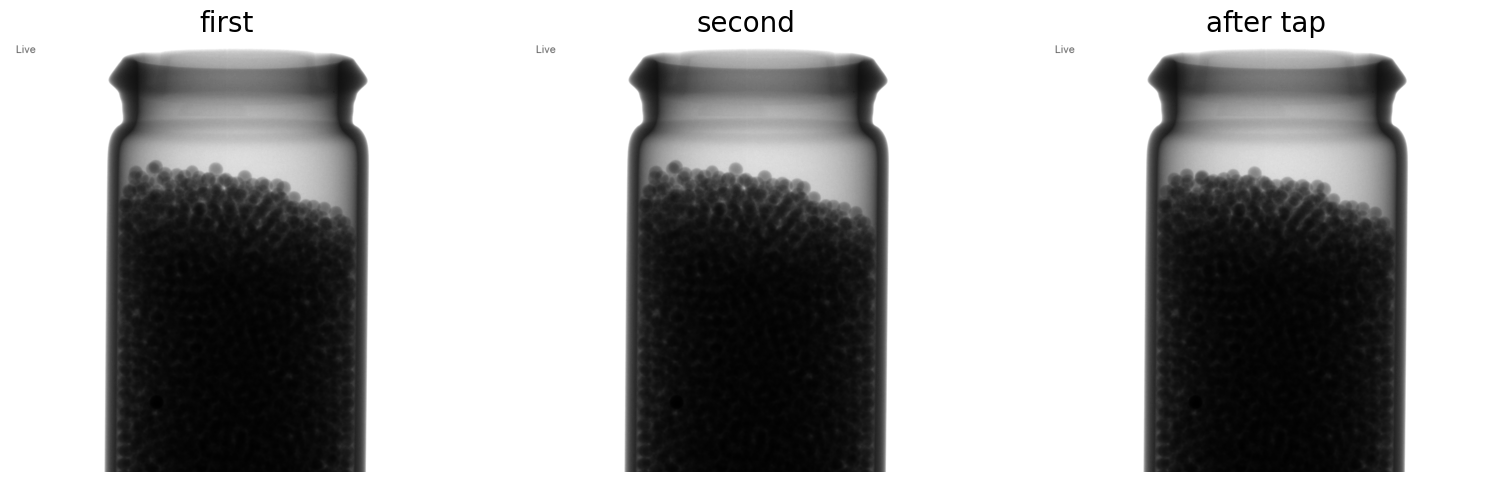

In [2]:
from skimage.io import imread
first = imread('first.png')
second = imread('second.png')
after_tap = imread('after_tap.png')

plt.figure(figsize=(19,6))

plt.subplot(131)
plt.imshow(first, cmap = plt.cm.gray)
plt.axis('off')
plt.title('first', fontsize=20)

plt.subplot(132)
plt.imshow(second, cmap = plt.cm.gray)
plt.axis('off')
plt.title('second', fontsize=20)

plt.subplot(133)
plt.imshow(after_tap, cmap = plt.cm.gray)
plt.axis('off')
plt.title('after tap', fontsize=20)

plt.show()

### caveat: real BW images are loaded as 8 Bit unsigned integers

In [3]:
print('first image:',first.shape, first.dtype, first.min(), first.max())  

first image: (1023, 1024) uint8 0 255


for comparison:

ski_image_bw = color.rgb2gray(imread('astronaut.png'))

created a float:

ski_image_bw: (512, 512)   float64  0.0  1.0

## image subtraction: the influence of the datatype

In [4]:
# the naive way
diff_raw =   first - second

# converting to floating point
diff_np =  np.float32(first) -  np.float32(second)

# using a specialzed converter 
from skimage import img_as_float
diff_iaf =  img_as_float(first) -  img_as_float(second)

print(diff_raw.dtype, diff_np.dtype, diff_iaf.dtype)

uint8 float32 float64


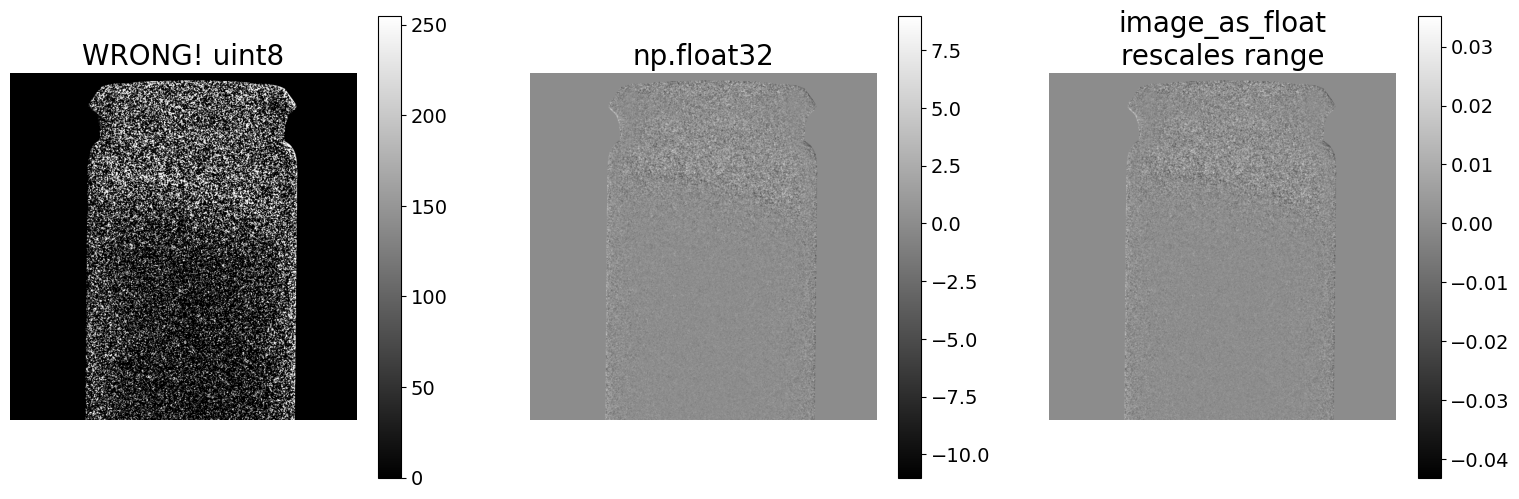

In [5]:
plt.figure(figsize=(19,6))

plt.subplot(131)
plt.imshow(diff_raw, cmap = plt.cm.gray)
plt.axis('off')
plt.colorbar()
plt.title('WRONG! uint8', fontsize=20)

plt.subplot(132)
plt.imshow(diff_np, cmap = plt.cm.gray)
plt.axis('off')
plt.colorbar()
plt.title('np.float32', fontsize=20)

plt.subplot(133)
plt.imshow(diff_iaf, cmap = plt.cm.gray)
plt.axis('off')
plt.colorbar()
plt.title('image_as_float\nrescales range', fontsize=20)

plt.show()


## image subtraction: motion detection

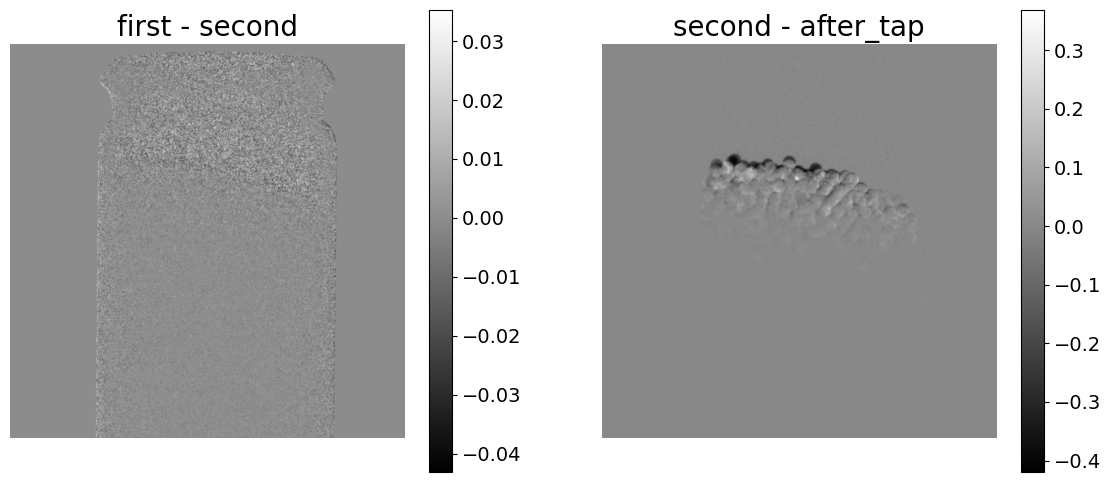

In [6]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.imshow(diff_iaf, cmap = plt.cm.gray)
plt.axis('off')
plt.colorbar()
plt.title('first - second', fontsize=20)

plt.subplot(122)
plt.imshow(img_as_float(second) -  img_as_float(after_tap), cmap = plt.cm.gray)
plt.axis('off')
plt.colorbar()
plt.title('second - after_tap', fontsize=20)

plt.show()